

## Analysis of blood sugar level patterns and insulin dose administration in   

## Patients based on daily blood sugar level given for span of 2-3 years






## Data-set for analysis

 **Apache Spark** has been used to analyze blodd sugar report of around 50 Patients based on the data set obtained bt below source. 




The format of the data in the base file consists of the following:

<table border="1" style="width:90%">
  <tr>
    <th>PATIENT_NO</th><th>DATE</th><th>TIME</th><th>CODE</th><th>VALUE</th>
  </tr>
  <tr>
    <td>Patient_1</td><td>4/21/1991</td><td>9:09</td><td>58</td><td>100</td>
  </tr>
    <tr>
    <td>Patient_1</td><td>4/21/1991</td><td>9:09</td><td>33</td><td>9</td>
  </tr>
    <tr>
    <td>Patient_1</td><td>4/21/1991</td><td>9:09</td><td>34</td><td>13</td>
  </tr>
    <tr>
    <td>Patient_1</td><td>4/22/1991</td><td>10:09</td><td>58</td><td>105</td>
  </tr>
  <tr>
    <td>Patient_2</td><td>4/28/1991</td><td>9:09</td><td>34</td><td>10</td>>
  </tr>
  <tr>
    <td>Patient_2</td><td>4/20/1991</td><td>9:09</td><td>58</td><td>120</td>
  </tr>
  <tr>
    <td>...</td><td>...</td><td>...</td><td>...</td><td>...</td>
  </tr>
</table>
<p>


## Load Data
Befor we can access the stored file in Object Storage using the [`SparkContext`](https://spark.apache.org/docs/1.6.0/api/python/pyspark.html#pyspark.SparkContext), we have to set the Hadoop configuration. This can be done with the following configuration function:

In [177]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v3/auth/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In the code cell below, credentials for Sourse files have been pasted.

In [178]:

credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_d19e928b_e4b5_41c3_a1dd_52e0ef9cd369',
  'project_id':'1ef29c85000e4bd4adf3a905dd6661a6',
  'region':'dallas',
  'user_id':'33ddb0cd7f46410ea83ded6c172cfae2',
  'domain_id':'22da6bc73b8444b1adfaef5af9c4fec5',
  'domain_name':'965639',
  'username':'Admin_371a7c9d53ca9e41673e1b29dae0d93301fa7ab2',
  'password':"""l~1jS}aD02uJ^J0n""",
  'filename':'Patient_1_Record.csv',
  'container':'notebooks',
  'tenantId':'s244-0fd88f7a010898-26760440299a'
};
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_d19e928b_e4b5_41c3_a1dd_52e0ef9cd369',
  'project_id':'1ef29c85000e4bd4adf3a905dd6661a6',
  'region':'dallas',
  'user_id':'33ddb0cd7f46410ea83ded6c172cfae2',
  'domain_id':'22da6bc73b8444b1adfaef5af9c4fec5',
  'domain_name':'965639',
  'username':'Admin_371a7c9d53ca9e41673e1b29dae0d93301fa7ab2',
  'password':"""l~1jS}aD02uJ^J0n""",
  'filename':'Code_Description.csv',
  'container':'notebooks',
  'tenantId':'s244-0fd88f7a010898-26760440299a'
};
credentials = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_d19e928b_e4b5_41c3_a1dd_52e0ef9cd369',
  'project_id':'1ef29c85000e4bd4adf3a905dd6661a6',
  'region':'dallas',
  'user_id':'33ddb0cd7f46410ea83ded6c172cfae2',
  'domain_id':'22da6bc73b8444b1adfaef5af9c4fec5',
  'domain_name':'965639',
  'username':'Admin_371a7c9d53ca9e41673e1b29dae0d93301fa7ab2',
  'password':"""l~1jS}aD02uJ^J0n""",
  'filename':'Diabetes_Consolidated_data.csv',
  'container':'notebooks',
  'tenantId':'s244-0fd88f7a010898-26760440299a'
}

Hadoop configuration name has been set with "keystone". 

In [179]:
credentials['name'] = 'keystone'
set_hadoop_config(credentials)

In [180]:
credentials_1['name'] = 'keystone_1'
set_hadoop_config(credentials_1)

In [181]:
credentials_2['name'] = 'keystone_2'
set_hadoop_config(credentials)

With the raw data file stored in Object Storage, we can now access it using the configured `SparkContext` in our notebook. 

Below is the RDD created [`RDD`](https://spark.apache.org/docs/1.6.0/programming-guide.html#resilient-distributed-datasets-rdds) from the raw data file to refer it using a URI of the form: swift://container_name.name/object_name

In [182]:
record = sc.textFile("swift://notebooks.keystone/Diabetes_Consolidated_data.csv")

In [183]:
record_1 = sc.textFile("swift://notebooks.keystone/Code_Description.csv")

In [184]:
record_2 = sc.textFile("swift://notebooks.keystone/Patient_1_Record.csv")

## Results & Findings:

## 1. Total number of records present in blood sugar report data files


In [185]:
print "Total records in the Diabetes_Consolidated_data.csv dataset:", record.count()

Total records in the Diabetes_Consolidated_data.csv dataset: 19872


In [186]:
print "Total records in the Code_Description.csv dataset:", record_1.count()

Total records in the Code_Description.csv dataset: 21


In [187]:
print "Total records in the Patient_1_Record.csv dataset:", record_2.count()

Total records in the Patient_1_Record.csv dataset: 943


## Results & Findings:

## 2. Column names and Records value types in each dataset
 


In [188]:
print "The first row in the Diabetes_Consolidated_data.csv dataset:", record.first()

The first row in the Diabetes_Consolidated_data.csv dataset: Patient_No,Date,Time,Code,Value


In [189]:
print "The first row in the Code_Description.csv dataset:", record_1.first()

The first row in the Code_Description.csv dataset: Code,Description


In [190]:
print "The first row in the Patient_1_Record.csv dataset:", record_2.first()

The first row in the Patient_1_Record.csv dataset: 4/21/1991,9:09,58,100


## Parse Data to Calculate the Average values of blood Sugar in Each Patient

In [191]:
recordParse = record.map(lambda line : line.split(","))

In [192]:
record_1Parse = record_1.map(lambda line : line.split(","))

In [193]:
record_2Parse = record_2.map(lambda line : line.split(","))

In [194]:
recordParse.first()

[u'Patient_No', u'Date', u'Time', u'Code', u'Value']

In [195]:
recordParse.first()[0]

u'Patient_No'

In [196]:
recordParse.first()[2]

u'Time'

## Reduce Dataset to get pre-breakfast and pre-supper blood sugar level in 

## Patients


In [197]:
Record_Glucose = recordParse.filter(lambda x: x[3] == "58")

In [198]:
Record_Glucose_1 = recordParse.filter(lambda x: x[3] == "62")

In [199]:
Record_Glucose.first()

[u'Patient_1', u'4/21/1991', u'9:09', u'58', u'100']

In [200]:
Record_Glucose_1.first()

[u'Patient_1', u'4/21/1991', u'17:08', u'62', u'119']

In [201]:
# x[0] is the patient
# x[4] is the pre-breakfast blood sugar measurement
Record_GlucoseCountByKey = Record_Glucose.map(lambda x : (x[0], (int(x[4]), 1)))

In [202]:
# x[0] is the patient
# x[4] is the pre-breakfast blood sugar measurement
Record_Glucose_1_CountByKey = Record_Glucose_1.map(lambda x : (x[0], (int(x[4]), 1)))

In [203]:
Record_GlucoseCountByKey.first()

(u'Patient_1', (100, 1))

In [204]:
Record_Glucose_1_CountByKey.first()

(u'Patient_1', (119, 1))

In [205]:
Record_GlucoseCountByKey.top(10)

[(u'Patient_9', (365, 1)),
 (u'Patient_9', (346, 1)),
 (u'Patient_9', (309, 1)),
 (u'Patient_9', (297, 1)),
 (u'Patient_9', (289, 1)),
 (u'Patient_9', (254, 1)),
 (u'Patient_9', (241, 1)),
 (u'Patient_9', (219, 1)),
 (u'Patient_9', (203, 1)),
 (u'Patient_9', (156, 1))]

In [206]:
Record_Glucose_1_CountByKey.top(10)

[(u'Patient_9', (324, 1)),
 (u'Patient_9', (281, 1)),
 (u'Patient_9', (270, 1)),
 (u'Patient_9', (261, 1)),
 (u'Patient_9', (252, 1)),
 (u'Patient_9', (222, 1)),
 (u'Patient_9', (213, 1)),
 (u'Patient_9', (195, 1)),
 (u'Patient_9', (142, 1)),
 (u'Patient_9', (121, 1))]

In [207]:
Record_GlucoseAddByKey = Record_GlucoseCountByKey.reduceByKey(lambda v1,v2 : (v1[0]+v2[0], v1[1]+v2[1]))

In [208]:
Record_Glucose_1_AddByKey = Record_Glucose_1_CountByKey.reduceByKey(lambda v1,v2 : (v1[0]+v2[0], v1[1]+v2[1]))  

In [209]:
Record_GlucoseAddByKey.first()

(u'Patient_13', (6411, 32))

In [210]:
Record_Glucose_1_AddByKey.first()

(u'Patient_13', (2659, 24))



## Computing the Average Values for Each Patient (average of daily 

## blood sugar level given for span of 2-3 years for 50 Patients) and 

## sorting entire list to find Patients with Minimum and Maximum 

## levels




In [211]:
Record_GlucoseAverages = Record_GlucoseAddByKey.map(lambda k: (k[0], k[1][0] / float(k[1][1] ) ) )

In [212]:
Record_1_GlucoseAverages = Record_Glucose_1_AddByKey.map(lambda k: (k[0], k[1][0] / float(k[1][1] ) ) )

In [213]:
Record_GlucoseAverages.first()

(u'Patient_13', 200.34375)

In [214]:
Record_1_GlucoseAverages.first()

(u'Patient_13', 110.79166666666667)



## Results & Findings:

## 3 : Average Pre-breakfast blood Sugar of 50 Patients (calculated  

## based on daily blood sugar level given for span of 2-3 years)



In [215]:
for pair in Record_GlucoseAverages.top(50):
    print "patient %s had average Pre-breakfast blood Sugar of %f" % (pair[0],pair[1])

patient Patient_9 had average Pre-breakfast blood Sugar of 173.000000
patient Patient_8 had average Pre-breakfast blood Sugar of 186.658537
patient Patient_7 had average Pre-breakfast blood Sugar of 182.529412
patient Patient_6 had average Pre-breakfast blood Sugar of 213.523810
patient Patient_50 had average Pre-breakfast blood Sugar of 94.266667
patient Patient_5 had average Pre-breakfast blood Sugar of 147.432432
patient Patient_49 had average Pre-breakfast blood Sugar of 100.219512
patient Patient_48 had average Pre-breakfast blood Sugar of 172.483871
patient Patient_47 had average Pre-breakfast blood Sugar of 173.064516
patient Patient_46 had average Pre-breakfast blood Sugar of 192.718750
patient Patient_45 had average Pre-breakfast blood Sugar of 178.222222
patient Patient_44 had average Pre-breakfast blood Sugar of 180.142857
patient Patient_43 had average Pre-breakfast blood Sugar of 138.892857
patient Patient_42 had average Pre-breakfast blood Sugar of 104.353846
patient Pati



## Results & Findings:

## 4 : Average Pre-supper blood Sugar of 50 Patients (calculated based 

## on daily blood sugar level given for span of 2-3 years)



In [216]:
for pair in Record_1_GlucoseAverages.top(50):
    print "patient %s had average Pre-supper blood Sugar of %f" % (pair[0],pair[1])

patient Patient_9 had average Pre-supper blood Sugar of 160.052632
patient Patient_8 had average Pre-supper blood Sugar of 176.031250
patient Patient_7 had average Pre-supper blood Sugar of 182.655172
patient Patient_6 had average Pre-supper blood Sugar of 199.235294
patient Patient_50 had average Pre-supper blood Sugar of 89.607143
patient Patient_5 had average Pre-supper blood Sugar of 226.878788
patient Patient_49 had average Pre-supper blood Sugar of 90.875000
patient Patient_48 had average Pre-supper blood Sugar of 148.370370
patient Patient_47 had average Pre-supper blood Sugar of 102.791667
patient Patient_46 had average Pre-supper blood Sugar of 185.689655
patient Patient_45 had average Pre-supper blood Sugar of 167.625000
patient Patient_44 had average Pre-supper blood Sugar of 166.115385
patient Patient_43 had average Pre-supper blood Sugar of 176.040000
patient Patient_42 had average Pre-supper blood Sugar of 152.015625
patient Patient_41 had average Pre-supper blood Sugar o



## Results & Findings:

## 5 : Average Pre-breakfast blood Sugar of 50 Patients sorted in 

## descending order (calculated based on daily blood sugar

## level given for span of 2-3 years)




In [217]:
sugarTop10=[]
patientsTop10=[]
for pair in Record_GlucoseAverages.map(lambda (x,y) : (y,x)).top(50):
    sugarTop10.append(pair[0])
    patientsTop10.append(pair[1])
    print "Patient %s had average Pre-breakfast blood Sugar of %f" % (pair[1],pair[0])

Patient Patient_37 had average Pre-breakfast blood Sugar of 214.400000
Patient Patient_6 had average Pre-breakfast blood Sugar of 213.523810
Patient Patient_2 had average Pre-breakfast blood Sugar of 207.843750
Patient Patient_36 had average Pre-breakfast blood Sugar of 206.966667
Patient Patient_10 had average Pre-breakfast blood Sugar of 202.705882
Patient Patient_13 had average Pre-breakfast blood Sugar of 200.343750
Patient Patient_12 had average Pre-breakfast blood Sugar of 193.375000
Patient Patient_46 had average Pre-breakfast blood Sugar of 192.718750
Patient Patient_8 had average Pre-breakfast blood Sugar of 186.658537
Patient Patient_20 had average Pre-breakfast blood Sugar of 184.296296
Patient Patient_19 had average Pre-breakfast blood Sugar of 182.935484
Patient Patient_7 had average Pre-breakfast blood Sugar of 182.529412
Patient Patient_29 had average Pre-breakfast blood Sugar of 182.302013
Patient Patient_14 had average Pre-breakfast blood Sugar of 181.176471
Patient Pa



## Results & Findings:

## 6 : Average Pre-supper blood Sugar of 50 Patients sorted in 

## descending order (calculated based on daily blood sugar

## level given for span of 2-3 years)



In [218]:
sugar_1_Top10=[]
patients_1_Top10=[]
for pair in Record_1_GlucoseAverages.map(lambda (x,y) : (y,x)).top(50):
    sugar_1_Top10.append(pair[0])
    patients_1_Top10.append(pair[1])
    print "Patient %s had average Pre-supper blood Sugar of %f" % (pair[1],pair[0])

Patient Patient_5 had average Pre-supper blood Sugar of 226.878788
Patient Patient_4 had average Pre-supper blood Sugar of 217.843750
Patient Patient_10 had average Pre-supper blood Sugar of 214.058824
Patient Patient_16 had average Pre-supper blood Sugar of 203.083333
Patient Patient_6 had average Pre-supper blood Sugar of 199.235294
Patient Patient_2 had average Pre-supper blood Sugar of 190.784946
Patient Patient_41 had average Pre-supper blood Sugar of 189.100000
Patient Patient_32 had average Pre-supper blood Sugar of 188.000000
Patient Patient_46 had average Pre-supper blood Sugar of 185.689655
Patient Patient_20 had average Pre-supper blood Sugar of 184.659259
Patient Patient_7 had average Pre-supper blood Sugar of 182.655172
Patient Patient_17 had average Pre-supper blood Sugar of 177.400000
Patient Patient_18 had average Pre-supper blood Sugar of 176.321429
Patient Patient_43 had average Pre-supper blood Sugar of 176.040000
Patient Patient_8 had average Pre-supper blood Sugar 

##
##
## Creating Plots to show analysis results
##
##




## Results & Findings:

## 7 : Plot for Average Pre-breakfast blood Sugar of 50 Patients 

## sorted in descending order (calculated based on daily blood 

## sugar level given for span of 2-3 years)



Current size: [6.0, 4.0]


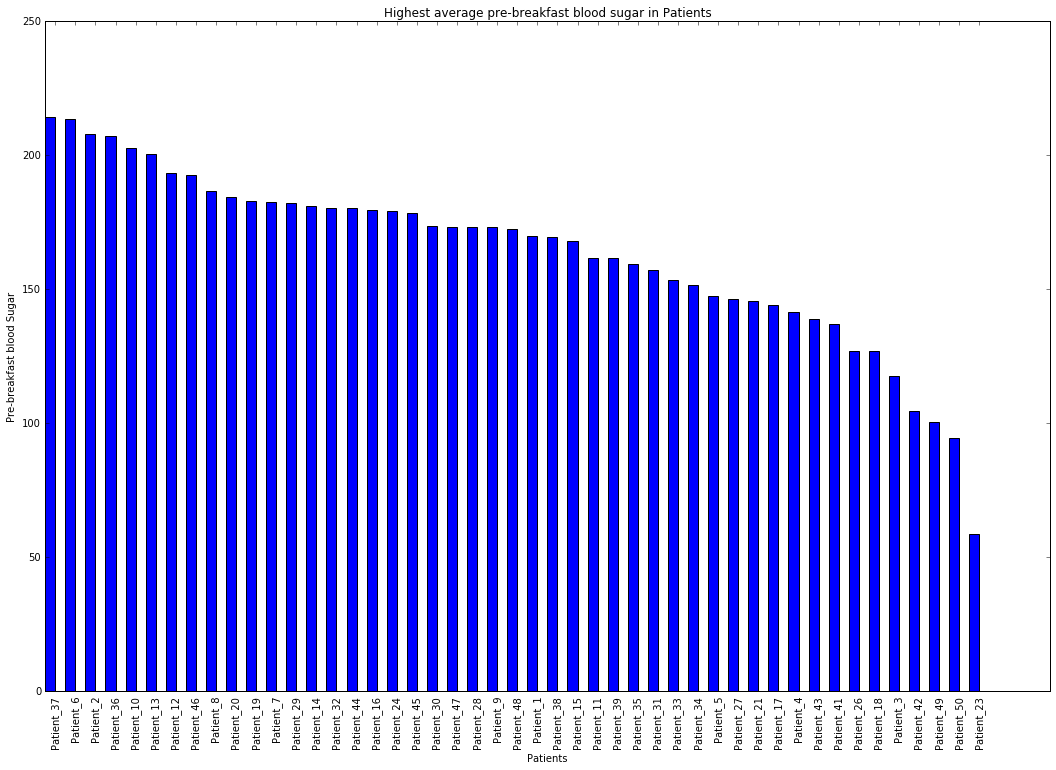

In [219]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

N = 47
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, sugarTop10, bar_width,
                 color='b')
plt.xlabel('Patients')
plt.ylabel('Pre-breakfast blood Sugar')
plt.title('Highest average pre-breakfast blood sugar in Patients')
plt.xticks(index + bar_width, patientsTop10, rotation=90)
plt.show()



## Results & Findings:

## 8 : Plot for Average Pre-supper blood Sugar of 50 Patients sorted 

## in descending order (calculated based on daily blood sugar 

## level given for span of 2-3 years)



Current size: [6.0, 4.0]


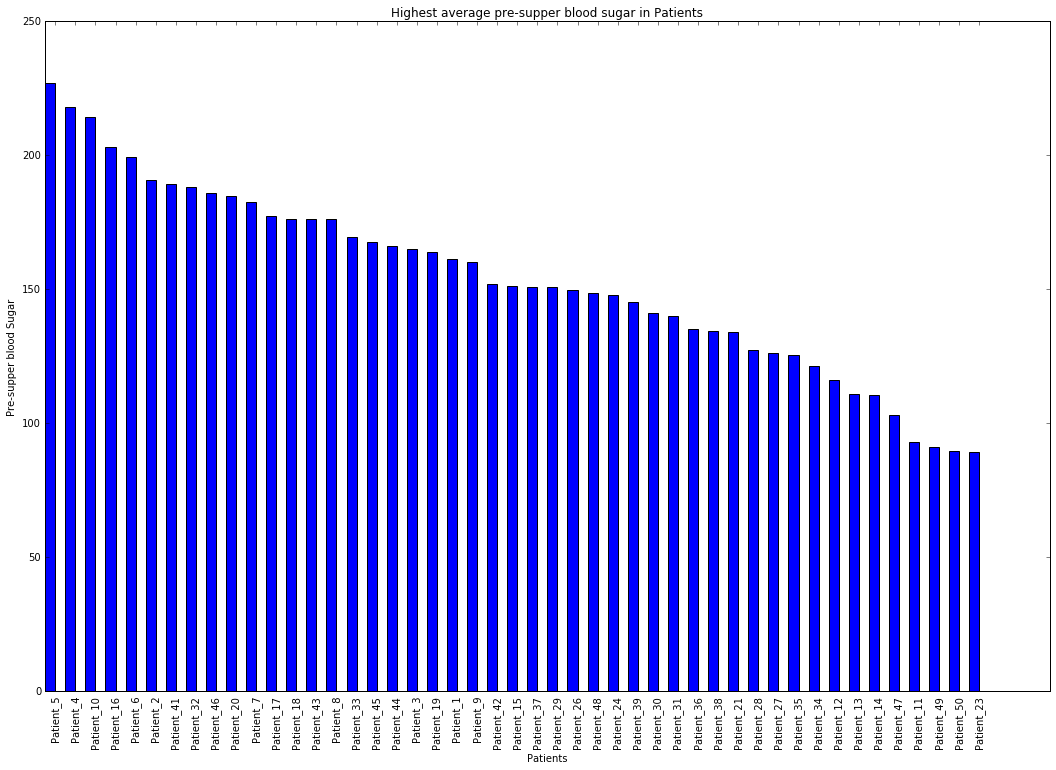

In [220]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

N = 47
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, sugar_1_Top10, bar_width,
                 color='b')
plt.xlabel('Patients')
plt.ylabel('Pre-supper blood Sugar')
plt.title('Highest average pre-supper blood sugar in Patients')
plt.xticks(index + bar_width, patients_1_Top10, rotation=90)
plt.show()



## Conclusion:

## Patient 23 has the lowest average blood sugar level in both pre-breakfast and   

## pre-supper durations. This indicates that proper quantity of insulin dose 

##  administration was carried out in this patient. Similar ratio of insulin dose 

##  if given to other patients should result in targeted limit on blood sugar level 

## in other patients.


